**Write a program to predict the eligibility of a customer for loan disbursement.**

**Process**

Steps are:
1.	Gathering Data
2.	Exploratory Data Analysis
3.	Data Visualizations
4.	Machine Learning Model Decision.
5.	Traing the ML Model
6.	Predict Model
7.	Deploy Model


**Important Libraries**


Python

Pandas

matplotlib

seaborn

sklearn


# IMPORT PACKAGES

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

1.Gathering Data

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving train (1).csv to train (1).csv
Saving test (1).csv to test (1).csv


Train file will be used for training the model, i.e. our model will learn from this file. It contains all the independent variables and the target variable.
Test file contains all the independent variables, but not the target variable. We will apply the model to predict the target variable for the test data.

In [ ]:
#  Create New Variable and stores the dataset values as Data Frame
# READING DATA
train=pd.read_csv("train (1).csv")
train.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
test=pd.read_csv("test (1).csv")
test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


We can also use ***train*** to show few rows from the first five and last five record from the dataset

In [ ]:
train # We have 614 rows and 13 columns in the train dataset.

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
test  #We have 367 rows and 12 columns in test dataset.

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


Here, we can see there are many rows and many columns, To know how many records and columns are available in our dataset, we can use the shape attribute or we can use len() to know how many records and how many features available in the dataset.

In [ ]:
print("Rows: ", len(train))

Rows:  614


In [ ]:
print("Columns: ", len(train.columns))

Columns:  13


we can get the shape of the dataset using shape attribute

We can see there are three formats of data types:

**object**: Object format means variables are categorical. Categorical variables in our dataset are Loan_ID, Gender, Married, Dependents, Education, Self_Employed, Property_Area, Loan_Status.
**int64**: It represents the integer variables. ApplicantIncome is of this format.
**float64**: It represents the variable that has some decimal values involved. They are also numerical

In [ ]:
print(train.shape, test.shape)

(614, 13) (367, 12)


After we collecting the data, Next step we need to understand what kind of data we have.

In [ ]:
train.columns  # print the list of columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
train_columns = train.columns # assign to a variable
train_columns # print the list of columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

Understanding the Data
First of all we use the ***train.describe()*** method to shows the important information from the dataset
It provides the count, mean, standard deviation (std), min, quartiles and max in its output.

In [ ]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


Another method is info(), This method show us the information about the dataset, Like
What's the type of culumn have?
How many rows available in the dataset?
What are the features are there?
How many null values available in the dataset?
Ans so on...

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


<Axes: xlabel='Loan_Status'>

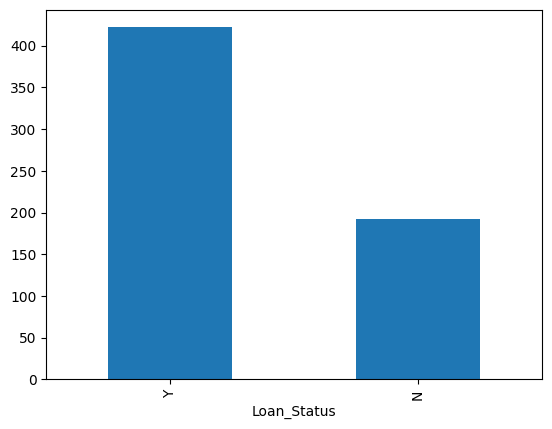

In [ ]:
train['Loan_Status'].value_counts().plot.bar()

Categorical features: These features have categories (Gender, Married ,Self_Employed, Credit_History, Loan_Status)

Ordinal features: Variables in categorical features having some order involved
(Dependents, Education, Property_Area)


Numerical features: These features have numerical values (ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term)

**Independent Variable (Categorical)**

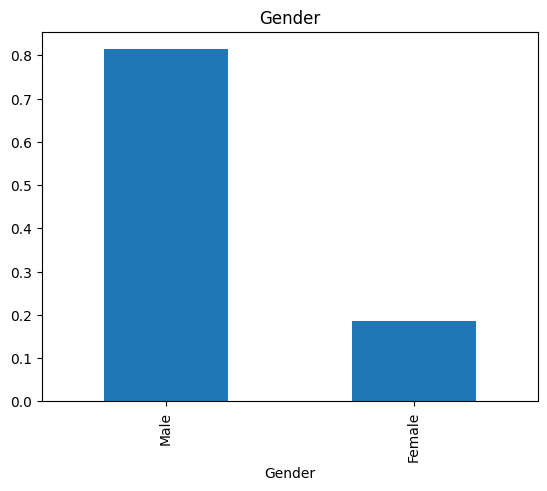

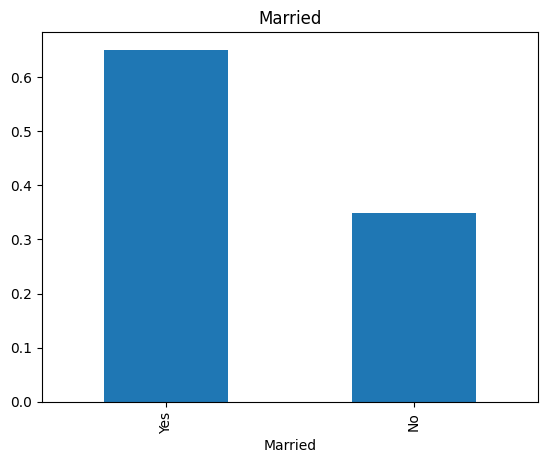

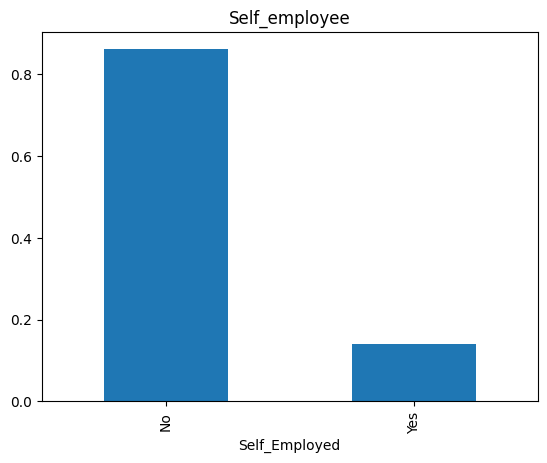

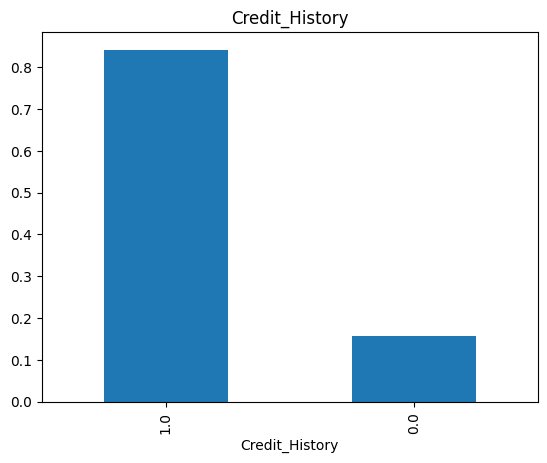

In [ ]:
train['Gender'].value_counts(normalize=True).plot.bar(title='Gender')
plt.show()
train['Married'].value_counts(normalize=True).plot.bar(title='Married')
plt.show()
train['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self_employee')
plt.show()
train['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit_History')
plt.show()

It can be inferred from the above bar plots that:

80% of applicants in the dataset are male.
Around 65% of the applicants in the dataset are married.
Around 15% of applicants in the dataset are self-employed.
Around 85% of applicants have repaid their doubts.

## **Independent Variable (Ordinal)**

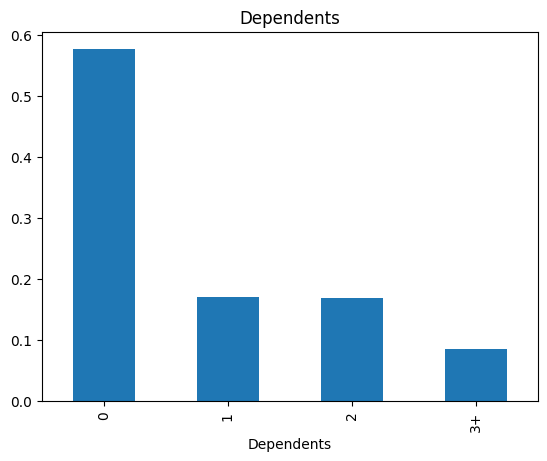

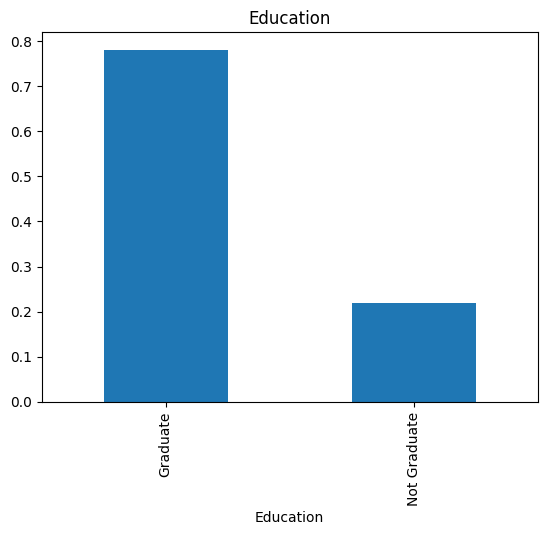

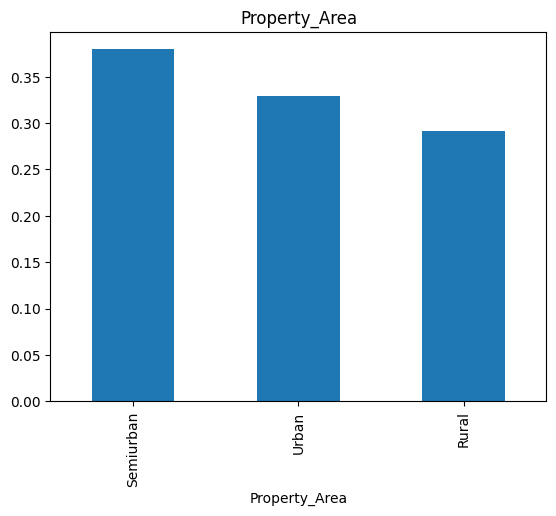

In [ ]:
train['Dependents'].value_counts(normalize=True).plot.bar(title='Dependents')
plt.show()
train['Education'].value_counts(normalize=True).plot.bar(title='Education')
plt.show()
train['Property_Area'].value_counts(normalize=True).plot.bar(title='Property_Area')
plt.show()

The following inferences can be made from the above bar plots:

Most of the applicants don't have any dependents.
Around 80% of the applicants are Graduate.
Most of the applicants are from the Semiurban area.

## **Independent Variable (Numerical)**
Till now we have seen the categorical and ordinal variables and now let's visualize the numerical variables. Let's look at the distribution of Applicant income first.

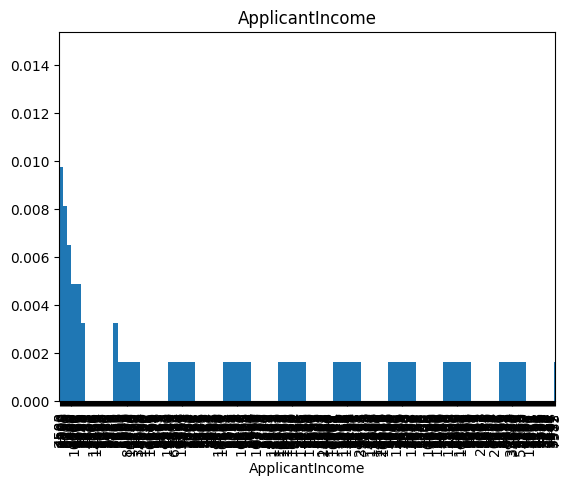

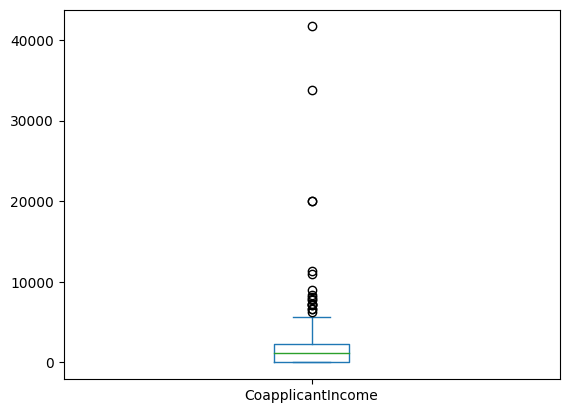

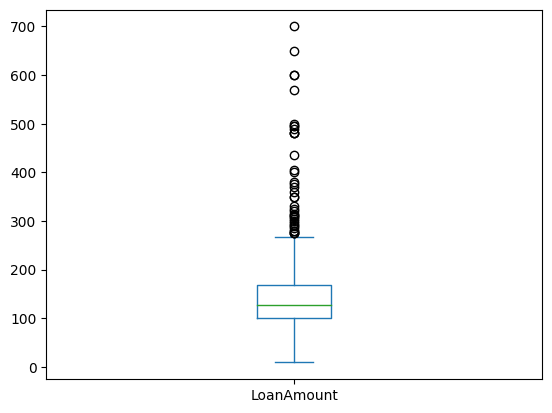

In [ ]:
train['ApplicantIncome'].value_counts(normalize=True).plot.bar(title='ApplicantIncome')
plt.show()
train['CoapplicantIncome'].plot.box()
plt.show()
train['LoanAmount'].plot.box()
plt.show()

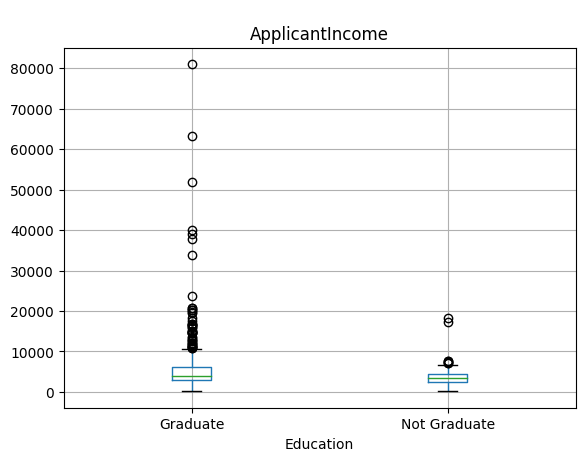

In [ ]:
train.boxplot(column='ApplicantIncome', by = 'Education')
plt.suptitle(' ')
plt.show()

# Categorical Independent Variable vs Target Variable
First of all, we will find the relation between the target variable and categorical independent variables. Let us look at the stacked bar plot now which will give us the proportion of approved and unapproved loans.

<Axes: xlabel='Gender'>

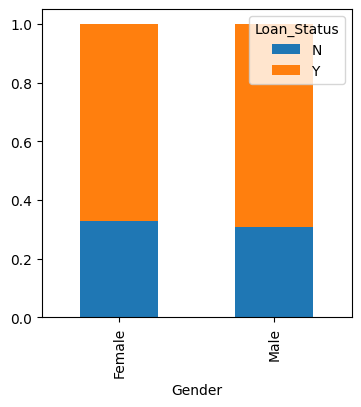

In [ ]:
Gender=pd.crosstab(train['Gender'],train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))

It can be inferred that the proportion of male and female applicants is more or less the same for both approved and unapproved loans.

## **Numerical Independent Variable vs Target Variable**
We will try to find the mean income of people for which the loan has been approved vs the mean income of people for which the loan has not been approved.
Here the y-axis represents the mean applicant income. We don’t see any change in the mean income. So, let’s make bins for the applicant income variable based on the values in it and analyze the corresponding loan status for each bin.

<Axes: xlabel='Loan_Status'>

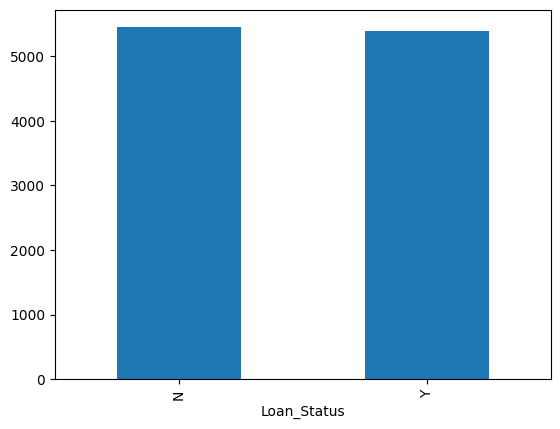

In [ ]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

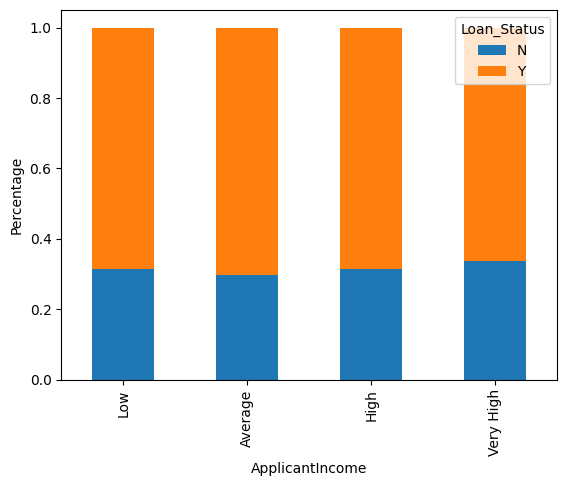

In [ ]:
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High','Very High']
train['Income_bin']=pd.cut(train['ApplicantIncome'],bins,labels=group)
Income_bin=pd.crosstab(train['Income_bin'],train['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)
plt.xlabel('ApplicantIncome')
P=plt.ylabel('Percentage')

In [ ]:
matrix=train.corr()
f,ax=plt.subplots(figsize=(9,6))
sns.heatmap(matrix,vmax=.8,square=True,cmap="BuPu",annot=True)

ValueError: could not convert string to float: 'LP001002'

In [ ]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
Income_bin            0
dtype: int64

In [ ]:
train['Gender'].fillna(train['Gender'].mode()[0],inplace=True)
print(train['Gender'])

0        Male
1        Male
2        Male
3        Male
4        Male
        ...  
609    Female
610      Male
611      Male
612      Male
613    Female
Name: Gender, Length: 614, dtype: object


In [ ]:
train['Married'].fillna(train['Married'].mode()[0],inplace=True)
print(train['Married'])

0       No
1      Yes
2      Yes
3      Yes
4       No
      ... 
609     No
610    Yes
611    Yes
612    Yes
613     No
Name: Married, Length: 614, dtype: object


In [ ]:
train['Dependents'].fillna(train['Dependents'].mode()[0],inplace=True)
print(train['Dependents'])

0       0
1       1
2       0
3       0
4       0
       ..
609     0
610    3+
611     1
612     2
613     0
Name: Dependents, Length: 614, dtype: object


In [ ]:
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0],inplace=True)
print(train['Self_Employed'])

0       No
1       No
2      Yes
3       No
4       No
      ... 
609     No
610     No
611     No
612     No
613    Yes
Name: Self_Employed, Length: 614, dtype: object


In [ ]:
train['LoanAmount'].fillna(train['LoanAmount'].mode()[0],inplace=True)
print(train['LoanAmount'])

0      120.0
1      128.0
2       66.0
3      120.0
4      141.0
       ...  
609     71.0
610     40.0
611    253.0
612    187.0
613    133.0
Name: LoanAmount, Length: 614, dtype: float64


In [ ]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mean(),inplace=True)
print(train['LoanAmount'])

0      120.0
1      128.0
2       66.0
3      120.0
4      141.0
       ...  
609     71.0
610     40.0
611    253.0
612    187.0
613    133.0
Name: LoanAmount, Length: 614, dtype: float64


In [ ]:
train['Credit_History'].fillna(train['Credit_History'].mean(),inplace=True)
print(train['Credit_History'])

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
609    1.0
610    1.0
611    1.0
612    1.0
613    0.0
Name: Credit_History, Length: 614, dtype: float64


In [ ]:
# let's check whether all the missing values are filled in the dataset.
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
Income_bin           0
dtype: int64

In [ ]:
X=train.drop('Loan_Status',1)
#X=train.drop('Loan_ID')
X=X.drop('Loan_ID',axis=1)
Y=train['Loan_Status']

X=pd.get_dummies(X)

print(X)
print(Y)

TypeError: DataFrame.drop() takes from 1 to 2 positional arguments but 3 were given

## 2.** Exploratory Data Analysis**

In this section, We learn about extra information about data and it's characteristics.

First of all, We explore object type of data So let's make a function to know how many types of values available in the column



In [ ]:
def explore_object_type(df ,feature_name):
    """
    To know, How many values available in object('categorical') type of features
    And Return Categorical values with Count.
    """
    if df[feature_name].dtype ==  'object':
        print(df[feature_name].value_counts())

In [ ]:
# After defined a function, Let's call it. and check what's the output of our created function.
# Now, Test and Call a function for gender only
explore_object_type(train, 'Gender')

Male      502
Female    112
Name: Gender, dtype: int64


In [ ]:
# Here's one little issue occurred, Suppose in your datasets there are lots of feature to defined like this above code.
# Solution is, Do you remember we have variable with name of `loan_train_columns`, Right,  let's use it
# 'Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status'

for featureName in train_columns:
    if train[featureName].dtype == 'object':
        print('\n"' + str(featureName) + '\'s" Values with count are :')
        explore_object_type(train, str(featureName))


"Loan_ID's" Values with count are :
LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: Loan_ID, Length: 614, dtype: int64

"Gender's" Values with count are :
Male      502
Female    112
Name: Gender, dtype: int64

"Married's" Values with count are :
Yes    401
No     213
Name: Married, dtype: int64

"Dependents's" Values with count are :
0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

"Education's" Values with count are :
Graduate        480
Not Graduate    134
Name: Education, dtype: int64

"Self_Employed's" Values with count are :
No     532
Yes     82
Name: Self_Employed, dtype: int64

"Property_Area's" Values with count are :
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

"Loan_Status's" Values with count are :
Y    422
N    192
Name: Loan_Status, dtype: int64


# MISSING VALUE IMPUTATION
There are missing values in Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term, and Credit_History features.

We will treat the missing values in all the features one by one.

We can consider these methods to fill the missing values:

For numerical variables: imputation using mean or median
For categorical variables: imputation using mode
There are very few missing values in Gender, Married, Dependents, Credit_History, and Self_Employed features so we can fill them using the mode of the features.

In [ ]:
# We need to fill null values with mean and median using missingno package
import missingno as msno
# list of how many percentage values are missing
train

train.isna().sum()
# round((loan_train.isna().sum() / len(loan_train)) * 100, 2)

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
Income_bin           0
dtype: int64

<Axes: >

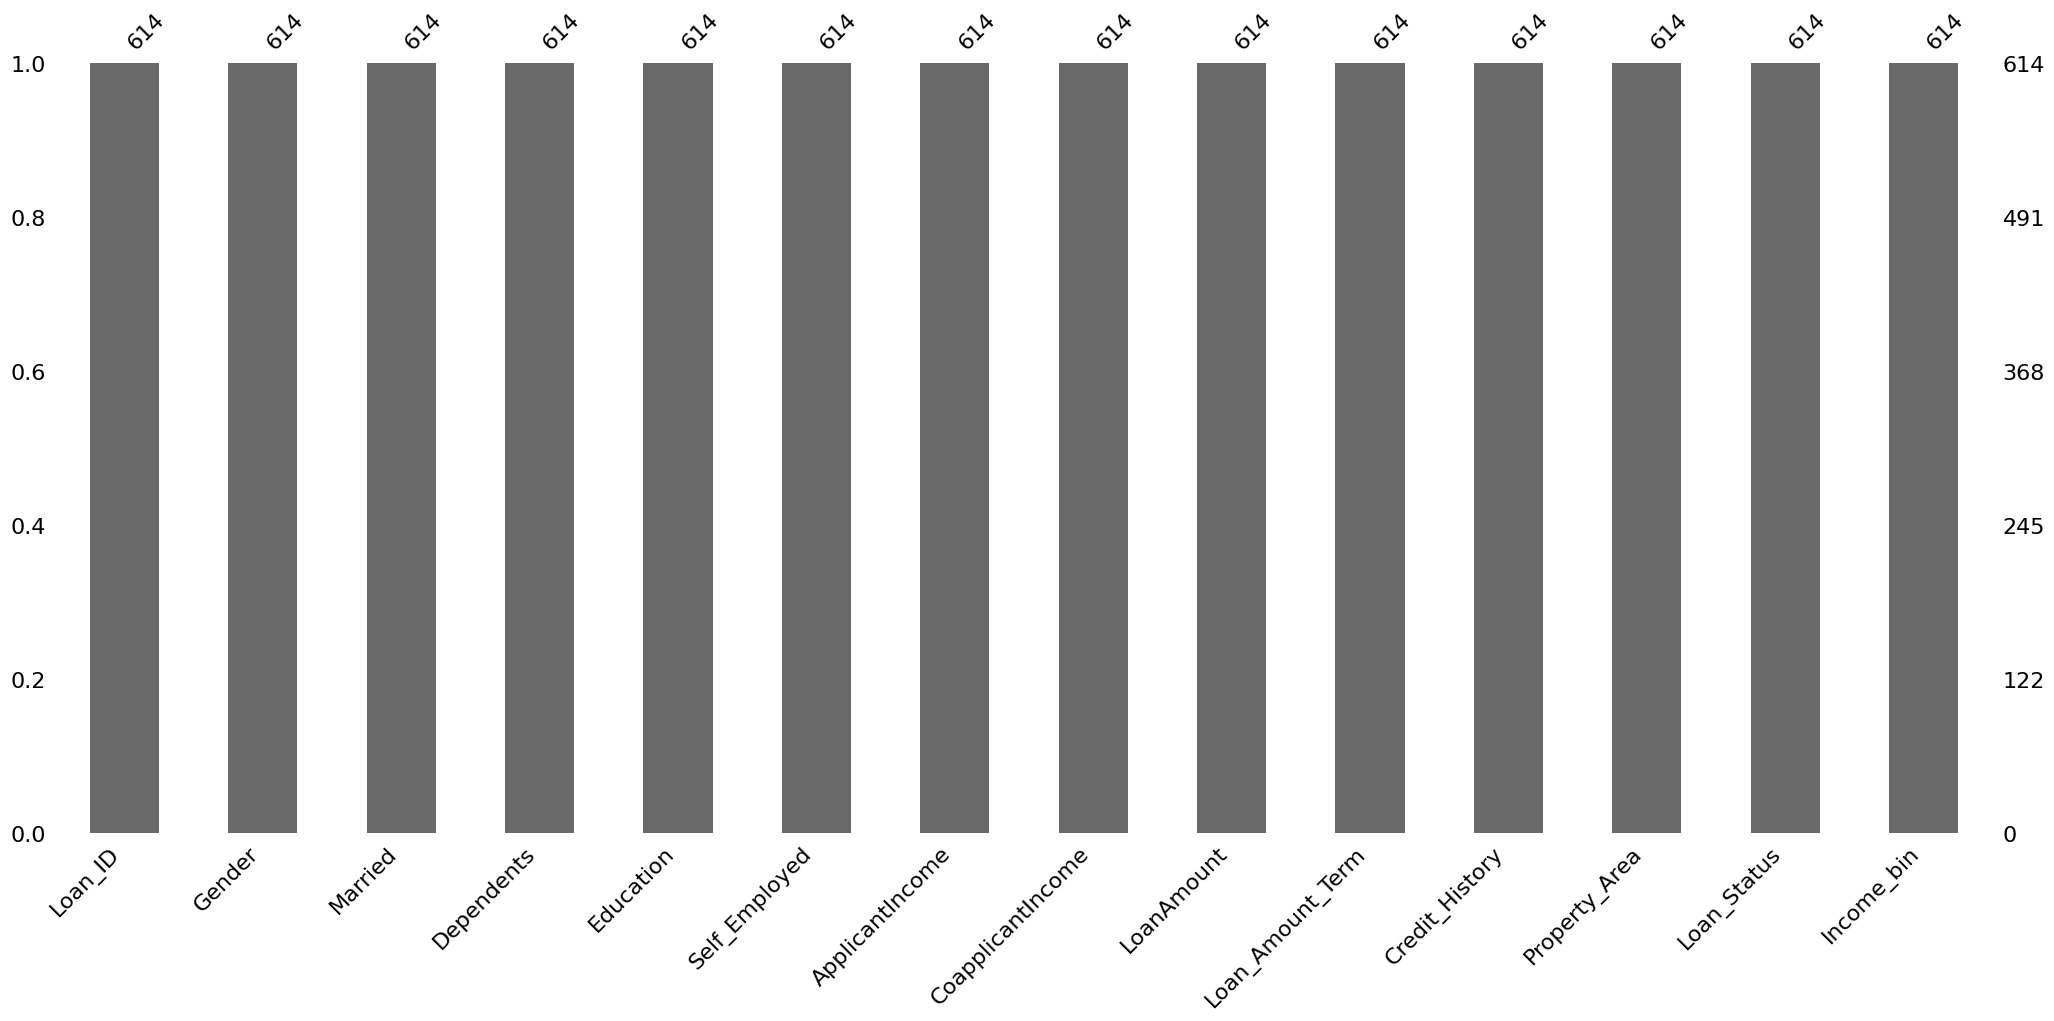

In [ ]:
msno.bar(train)

<Axes: >

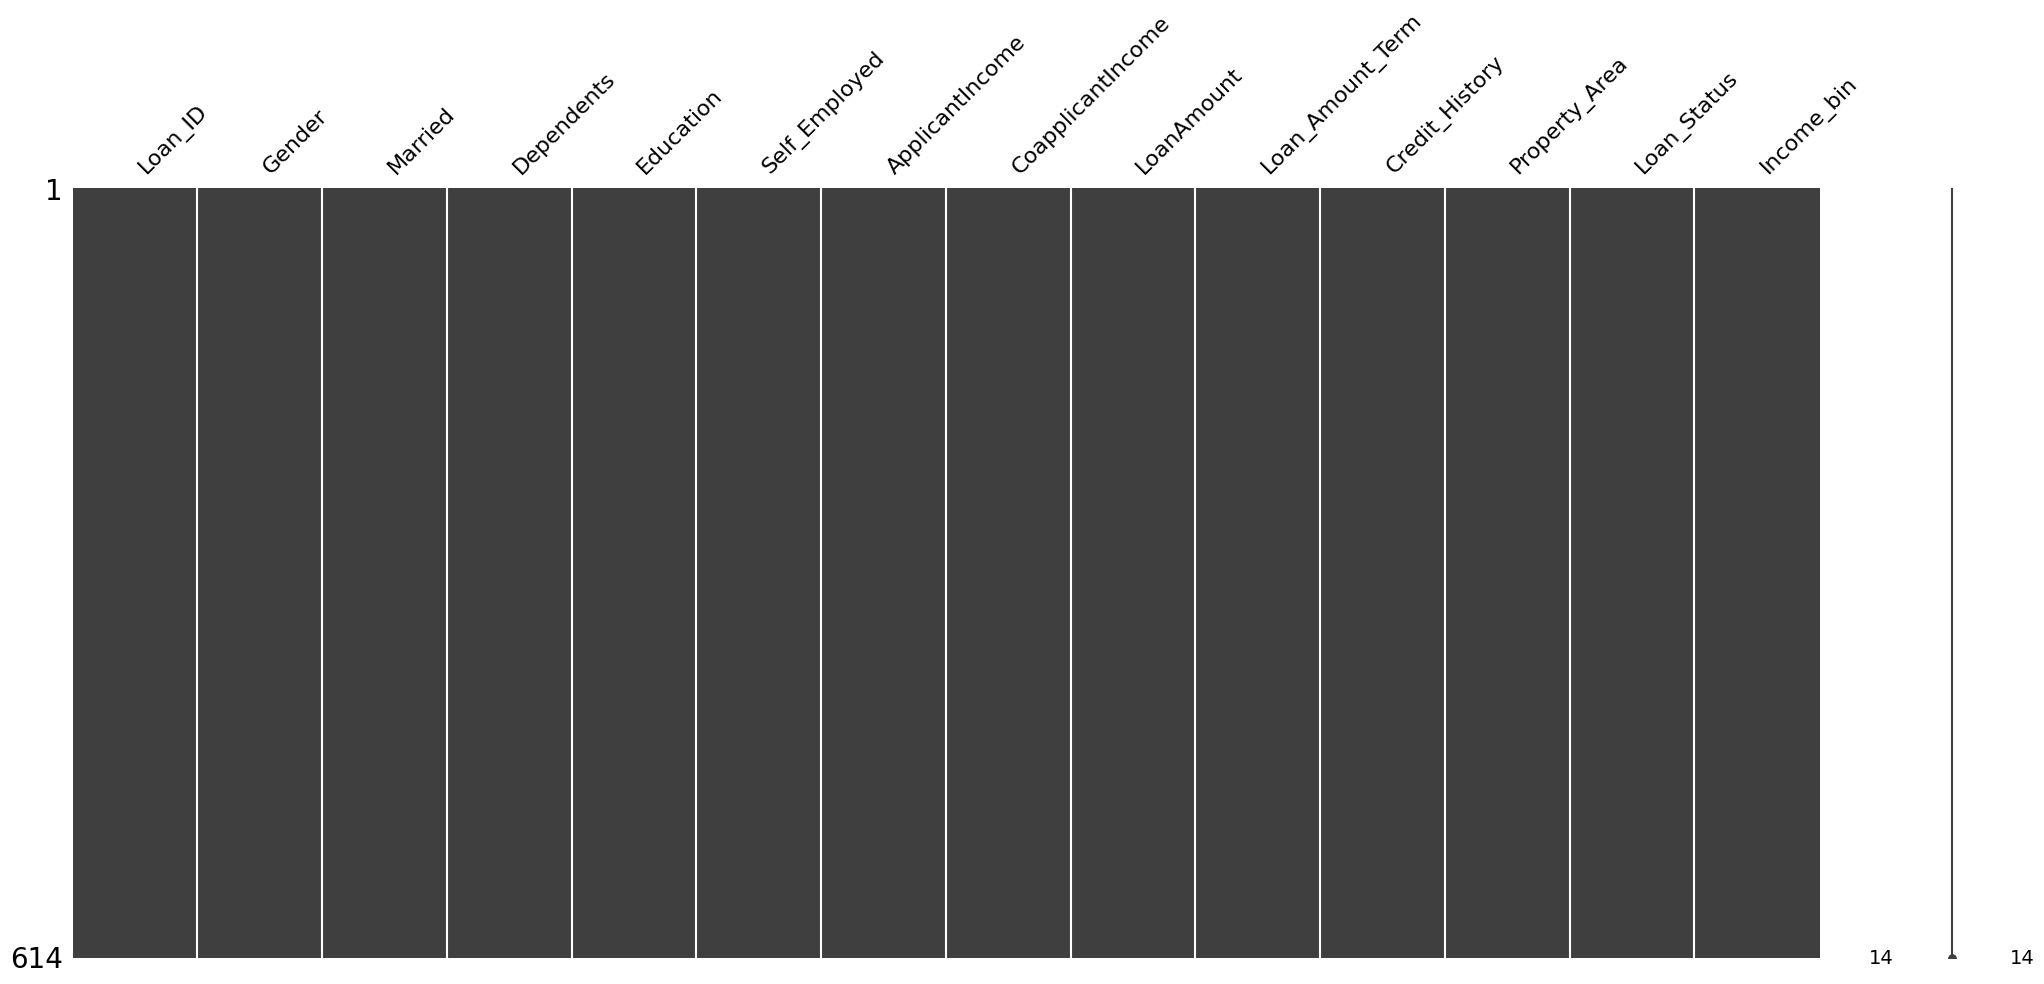

In [ ]:
msno.matrix(train )

In [ ]:
# As we can see here, there are too many columns missing with small amount of null values so we use mean amd mode to replace with NaN values.
train['Credit_History'].fillna(train['Credit_History'].mode(), inplace=True) # Mode
test['Credit_History'].fillna(test['Credit_History'].mode(), inplace=True) # Mode


train['LoanAmount'].fillna(train['LoanAmount'].mean(), inplace=True) # Mean
test['LoanAmount'].fillna(test['LoanAmount'].mean(), inplace=True) # Mean

In [ ]:
# convert Categorical variable with Numerical values.Loan_Status feature boolean values,
# So we replace Y values with 1 and N values with 0 and same for other Boolean types of columns
train.Loan_Status = train.Loan_Status.replace({"Y": 1, "N" : 0})
# test.Loan_Status = loan_test.Loan_Status.replace({"Y": 1, "N" : 0})

train.Gender = train.Gender.replace({"Male": 1, "Female" : 0})
test.Gender = test.Gender.replace({"Male": 1, "Female" : 0})

train.Married = train.Married.replace({"Yes": 1, "No" : 0})
test.Married = test.Married.replace({"Yes": 1, "No" : 0})

train.Self_Employed = train.Self_Employed.replace({"Yes": 1, "No" : 0})
test.Self_Employed = test.Self_Employed.replace({"Yes": 1, "No" : 0})


In [ ]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
test['Gender'].fillna(test['Gender'].mode()[0], inplace=True)

train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
test['Dependents'].fillna(test['Dependents'].mode()[0], inplace=True)

train['Married'].fillna(train['Married'].mode()[0], inplace=True)
test['Married'].fillna(test['Married'].mode()[0], inplace=True)

train['Credit_History'].fillna(train['Credit_History'].mean(), inplace=True)
test['Credit_History'].fillna(test['Credit_History'].mean(), inplace=True)

In [ ]:
# Here, Property_Area, Dependents and Education has multiple values so now we can use LabelEncoder from sklearn package
from sklearn.preprocessing import LabelEncoder
feature_col = ['Property_Area','Education', 'Dependents']
le = LabelEncoder()
for col in feature_col:
    train[col] = le.fit_transform(train[col])
    test[col] = le.fit_transform(test[col])

**Finally, We have all the features with numerical values**

**3. Data Visualizations**

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('dark')

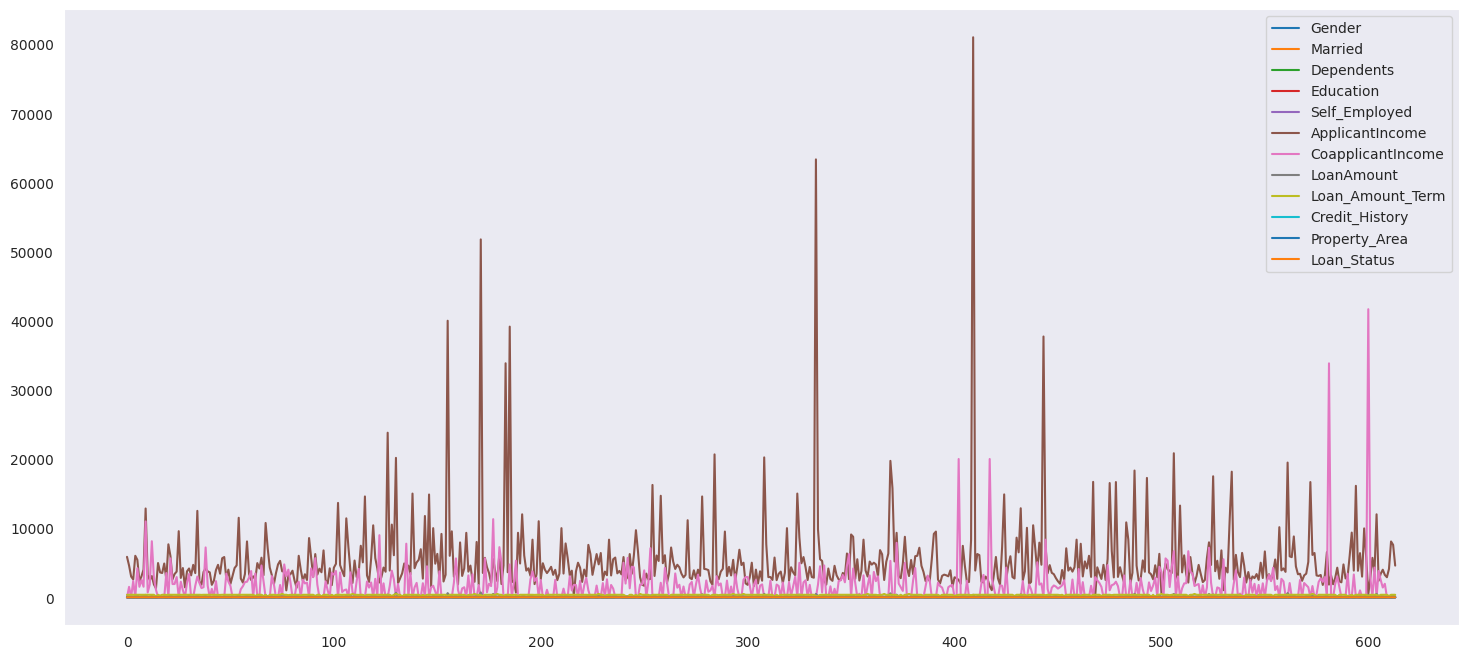

In [ ]:
train
train.plot(figsize=(18, 8))
plt.show()

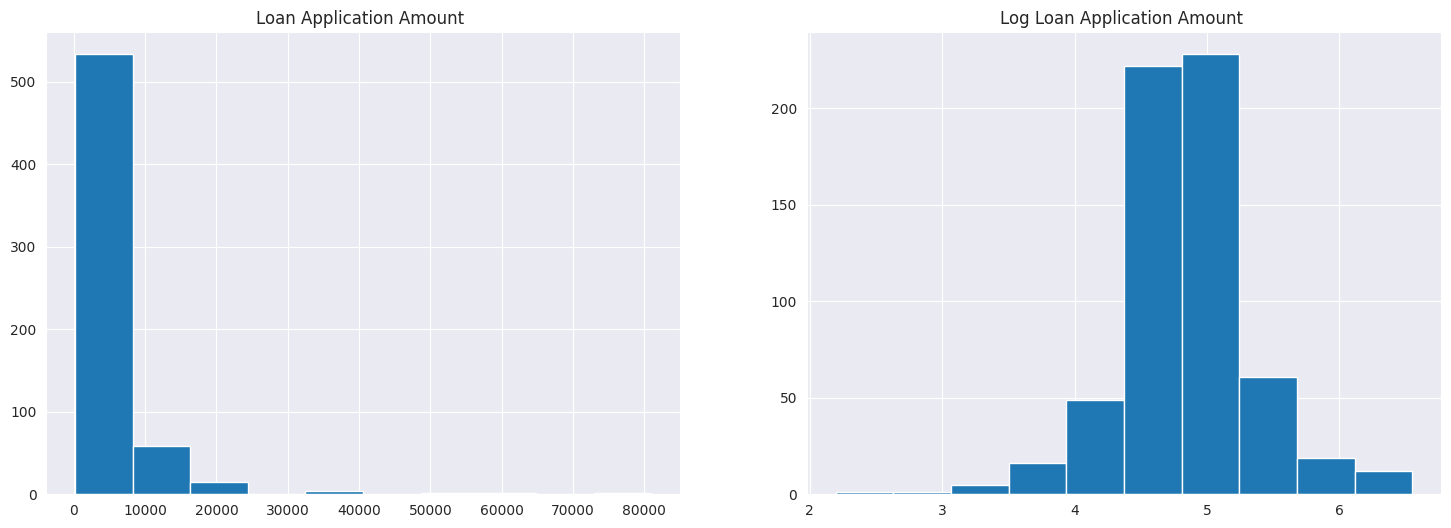

In [ ]:
plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)


train['ApplicantIncome'].hist(bins=10)
plt.title("Loan Application Amount ")

plt.subplot(1, 2, 2)
plt.grid()
plt.hist(np.log(train['LoanAmount']))
plt.title("Log Loan Application Amount ")

plt.show()

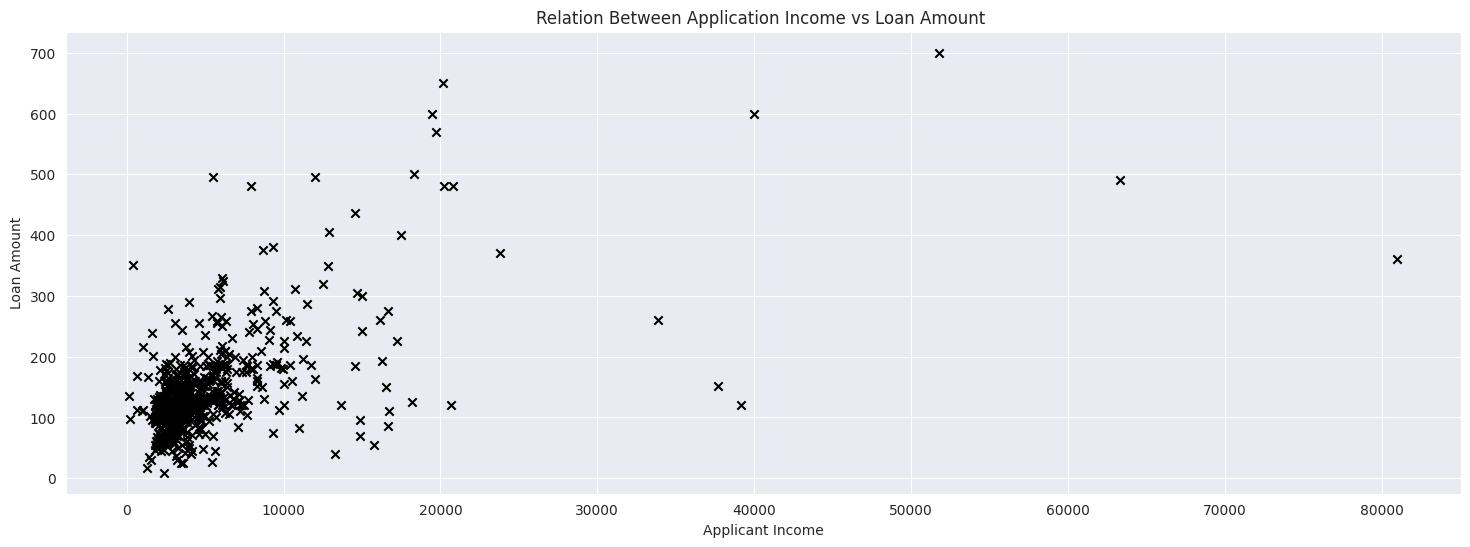

In [ ]:
plt.figure(figsize=(18, 6))
plt.title("Relation Between Application Income vs Loan Amount ")

plt.grid()
plt.scatter(train['ApplicantIncome'] , train['LoanAmount'], c='k', marker='x')
plt.xlabel("Applicant Income")
plt.ylabel("Loan Amount")
plt.show()

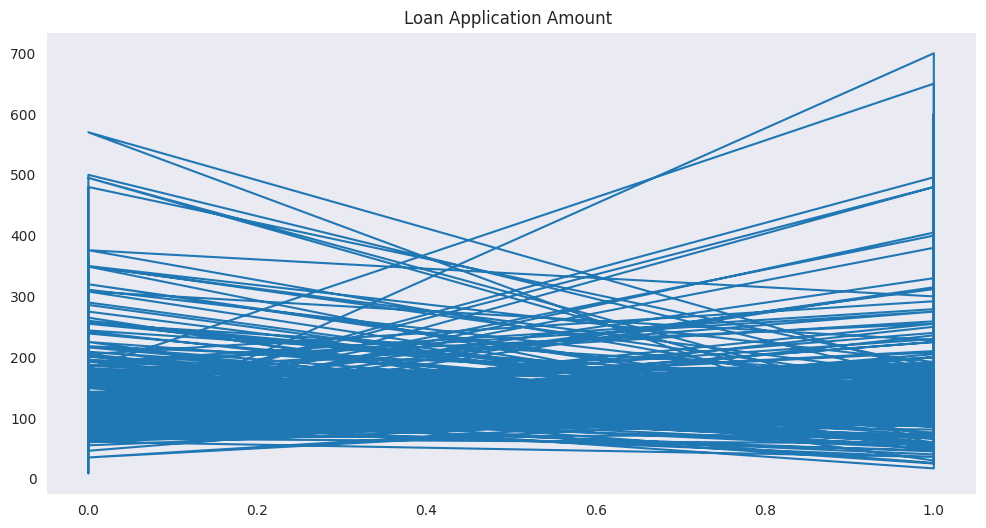

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(train['Loan_Status'], train['LoanAmount'])
plt.title("Loan Application Amount ")
plt.show()

<ipython-input-50-be2b78eb7d9e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr(), cmap='coolwarm', annot=True, fmt='.1f', linewidths=.1)


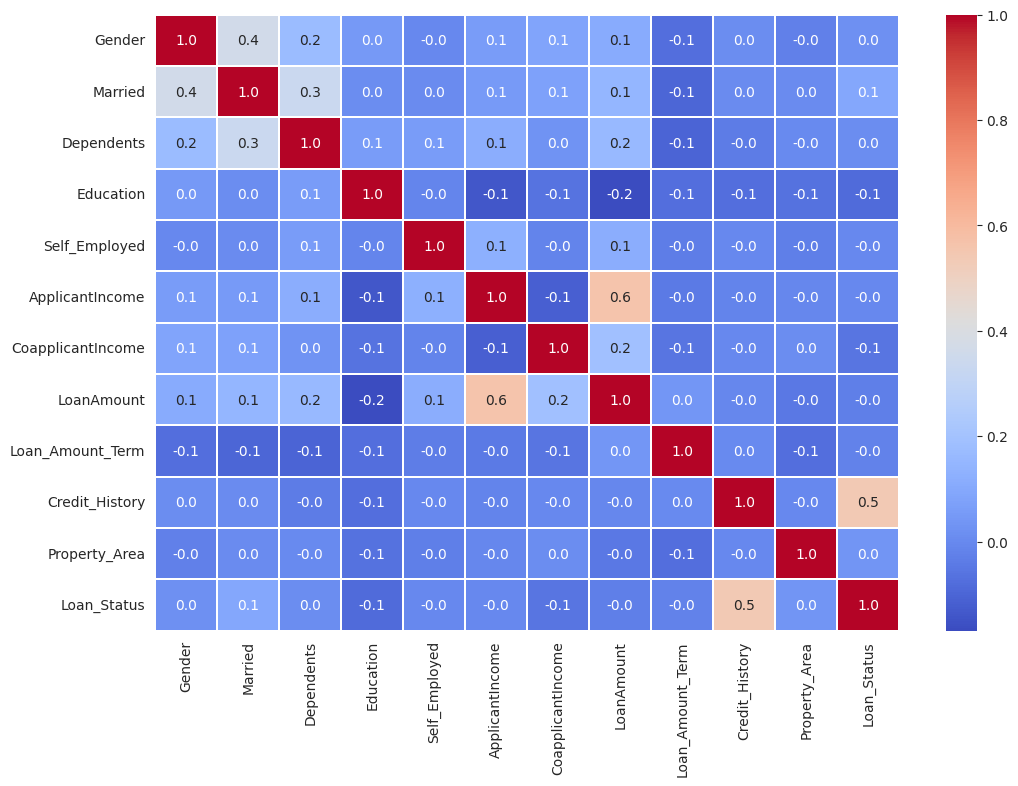

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(train.corr(), cmap='coolwarm', annot=True, fmt='.1f', linewidths=.1)
plt.show()

### In this heatmap, we can clearly seen the relation between two variables

## **Feature Engineering**
Based on the domain knowledge, we can come up with new features that might affect the target variable. We will create the following three new features:

**Total Income** — As discussed during bivariate analysis we will combine the Applicant Income and Co-applicant Income. If the total income is high, the chances of loan approval might also be high.
**EMI** — EMI is the monthly amount to be paid by the applicant to repay the loan. The idea behind making this variable is that people who have high EMI’s might find it difficult to pay back the loan. We **can** calculate the EMI by taking the ratio of the loan amount with respect to the loan amount term.
**Balance Incom**e — This is the income left after the EMI has been paid. The idea behind creating this variable is that if this value is high, the chances are high that a person will repay the loan and hence increasing the chances of loan approval.

<ipython-input-51-e3754bc766d6>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Total_Income'])


<Axes: xlabel='Total_Income', ylabel='Density'>

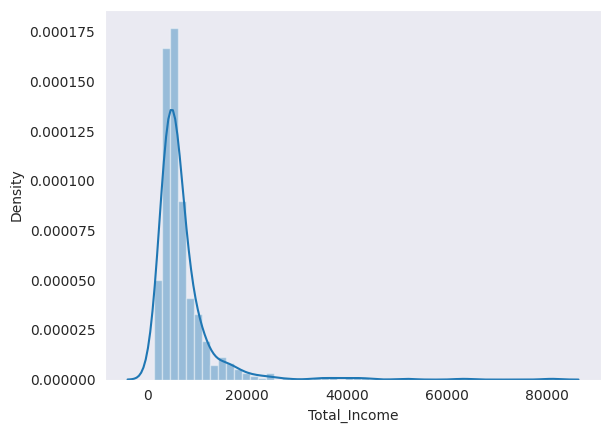

In [ ]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']
test['Total_Income']=test['ApplicantIncome']+test['CoapplicantIncome']
sns.distplot(train['Total_Income'])
# Let’s check the distribution of Total Income.

<ipython-input-52-9af183ae2b21>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['EMI'])


<Axes: xlabel='EMI', ylabel='Density'>

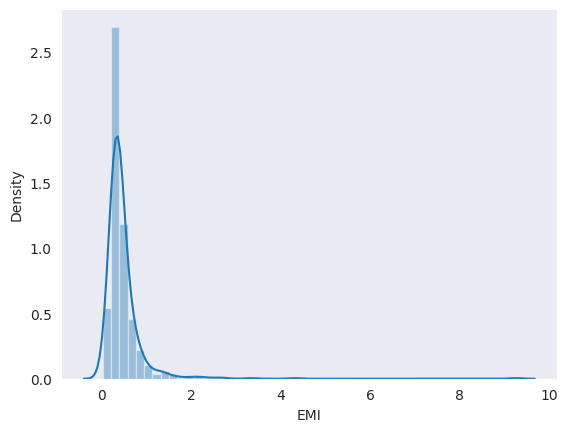

In [ ]:
train['EMI']=train['LoanAmount']/train['Loan_Amount_Term']
test['EMI']=test['LoanAmount']/test['Loan_Amount_Term']
sns.distplot(train['EMI'])

# Let’s check the distribution of the EMI variable.

<ipython-input-53-762f8c1ade1c>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Balance Income'])


<Axes: xlabel='Balance Income', ylabel='Density'>

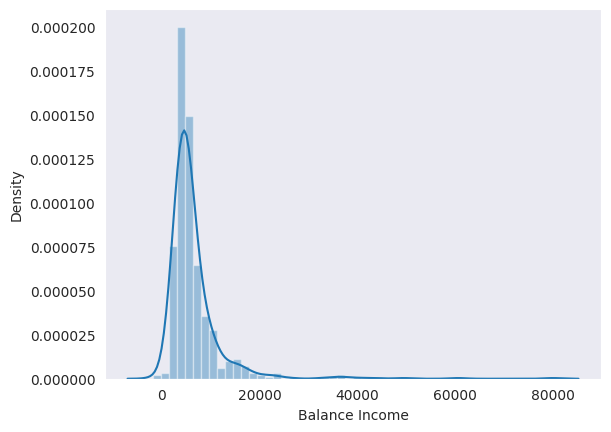

In [ ]:
train['Balance Income'] = train['Total_Income']-(train['EMI']*1000)
test['Balance Income']=test['Total_Income']-(test['EMI']*1000)
sns.distplot(train['Balance Income'])
# Let’s check the distribution of the Balance Income

### **4. Choose ML Model.**
In this step, We have a lots of Machine Learning Model from sklearn package, and we need to decide which model is give us the better performance. then we use that model in final stage and send to the production level.
## (** Model Building Process** - After creating new features, we can continue the model building process. So we will start with the logistic regression model and then move over to more complex models like RandomForest and XGBoost. We will build the following models in this section.)

In [ ]:
# import ml model from sklearn pacakge

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score

First of all, we are use LogisticRegression from sklearn.linear_model package. Here is the little information about LogisticRegression.

Logistic Regression is a classification algorithm. It is used to predict a binary outcome (1 / 0, Yes / No, and True / False) given a set of independent variables. To represent binary / categorical outcome, we use dummy variables. You can also think of logistic regression as a special case of linear regression when the outcome variable is categorical, where we are using log of odds as the dependent variable.

In [ ]:
# Let's build the model
logistic_model = LogisticRegression()

# **5. Traing the ML Model**
Before fitting the model, We need to decide how many feature are available for testing and training, then after complete this step. fitt the model
Currently, we are using Credit_History', 'Education', 'Gender features for training so let's create train and test variables

In [ ]:
train_features = ['Credit_History', 'Education', 'Gender']

x_train = train[train_features].values
y_train = train['Loan_Status'].values

x_test = test[train_features].values
logistic_model.fit(x_train, y_train)

LogisticRegression()

**6. Predict Model**

In [ ]:
# Predict the model for testin data
predicted = logistic_model.predict(x_test)

# check the coefficeints of the trained model
print('Coefficient of model :', logistic_model.coef_)

# check the intercept of the model
print('Intercept of model',logistic_model.intercept_)

# Accuray Score on train dataset
# accuracy_train = accuracy_score(x_test, predicted)
score = logistic_model.score(x_train, y_train)
print('accuracy_score overall :', score)
print('accuracy_score percent :', round(score*100,2))

Coefficient of model : [[ 3.316164   -0.3059193   0.09398266]]
Intercept of model [-1.98307795]
accuracy_score overall : 0.8094462540716613
accuracy_score percent : 80.94


In [ ]:
# predict the target on the test dataset
predict_test = logistic_model.predict(x_test)
print('Target on test data',predict_test)

Target on test data [1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1
 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0
 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1]


In [ ]:
x=len(predict_test)
print(x)

367
